# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Import Libraries
Import the necessary packages to perform the ETL process.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np
from sklearn.preprocessing import StandardScaler

# Extract and Load the data



In [2]:
# Load the data
df = pd.read_csv("../data/raw/creditcard.csv") # Load dataset from raw data folder

def etl_diagnostic(df, sample_size=1): # Function to perform ETL diagnostics on a DataFrame
    print(f"=== DATAFRAME OVERVIEW ===")
    print(f"Shape: {df.shape}")
    print(f"Duplicate rows: {df.duplicated().sum()} ({(df.duplicated().mean() * 100):.2f}%)")
    print("=" * 80)

    summary = pd.DataFrame({
        'dtype': df.dtypes,
        'null_count': df.isnull().sum(),
        'null_%': (df.isnull().mean() * 100).round(2),
        'unique_count': df.nunique(),
        'example_value': df.apply(lambda x: x.iloc[sample_size-1] if len(x) >= sample_size else np.nan)
    })

    # Numeric stats
    numeric_cols = df.select_dtypes(include=np.number).columns
    summary.loc[numeric_cols, 'mean'] = df[numeric_cols].mean().round(3)
    summary.loc[numeric_cols, 'std'] = df[numeric_cols].std().round(3)
    summary.loc[numeric_cols, 'min'] = df[numeric_cols].min().round(3)
    summary.loc[numeric_cols, 'max'] = df[numeric_cols].max().round(3)

    # Detect constant or near-constant columns
    summary['is_constant'] = summary['unique_count'] <= 1

    # Detect highly skewed numeric features
    skewness = df[numeric_cols].skew().round(2)
    summary.loc[numeric_cols, 'skewness'] = skewness

    # Detect potential outliers using z-score > 3
    from scipy.stats import zscore
    outlier_flags = {}
    for col in numeric_cols:
        z = np.abs(zscore(df[col]))
        outlier_flags[col] = (z > 3).sum()
    summary.loc[numeric_cols, 'outlier_count'] = pd.Series(outlier_flags)

    # Reorder columns for clarity
    summary = summary[[
        'dtype', 'null_count', 'null_%', 'unique_count',
        'mean', 'std', 'min', 'max', 'skewness',
        'outlier_count', 'is_constant', 'example_value'
    ]]

    print("\n=== SUMMARY TABLE ===")
    return summary
etl_diagnostic(df)

=== DATAFRAME OVERVIEW ===
Shape: (284807, 31)
Duplicate rows: 1081 (0.38%)

=== SUMMARY TABLE ===


,dtype,null_count,null_%,unique_count,mean,std,min,max,skewness,outlier_count,is_constant,example_value
Time,float64,0,0.0,124592,94813.860,47488.146,0.000,172792.000,-0.04,0.0,False,0.000000
V1,float64,0,0.0,275663,0.000,1.959,-56.408,2.455,-3.28,3701.0,False,-1.359807
V2,float64,0,0.0,275663,0.000,1.651,-72.716,22.058,-4.62,4318.0,False,-0.072781
V3,float64,0,0.0,275663,-0.000,1.516,-48.326,9.383,-2.24,1987.0,False,2.536347
V4,float64,0,0.0,275663,0.000,1.416,-5.683,16.875,0.68,3094.0,False,1.378155
V5,float64,0,0.0,275663,0.000,1.380,-113.743,34.802,-2.43,2945.0,False,-0.338321
V6,float64,0,0.0,275663,0.000,1.332,-26.161,73.302,1.83,4652.0,False,0.462388
V7,float64,0,0.0,275663,-0.000,1.237,-43.557,120.589,2.55,3401.0,False,0.239599
V8,float64,0,0.0,275663,0.000,1.194,-73.217,20.007,-8.52,4221.0,False,0.098698
V9,float64,0,0.0,275663,-0.000,1.099,-13.434,15.595,0.55,2293.0,False,0.363787


In [10]:
# extracting for practice purpose
df.to_csv("../data/clean/creditcard_practice.csv", index=False)

Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

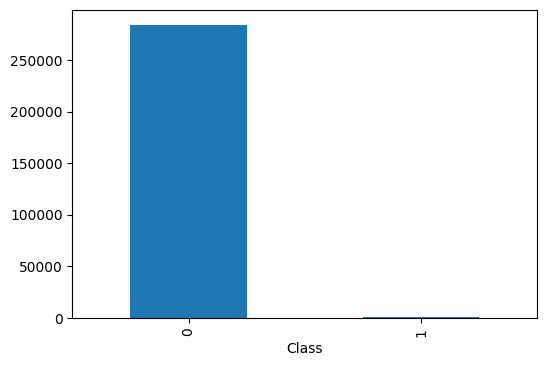

In [4]:
# print class distribution  
print(df['Class'].value_counts())
# Visualize the distribution of the 'Class' variable
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar')

Scale numeric columns
Amount and Time are not scaled like V1–V28

In [5]:
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

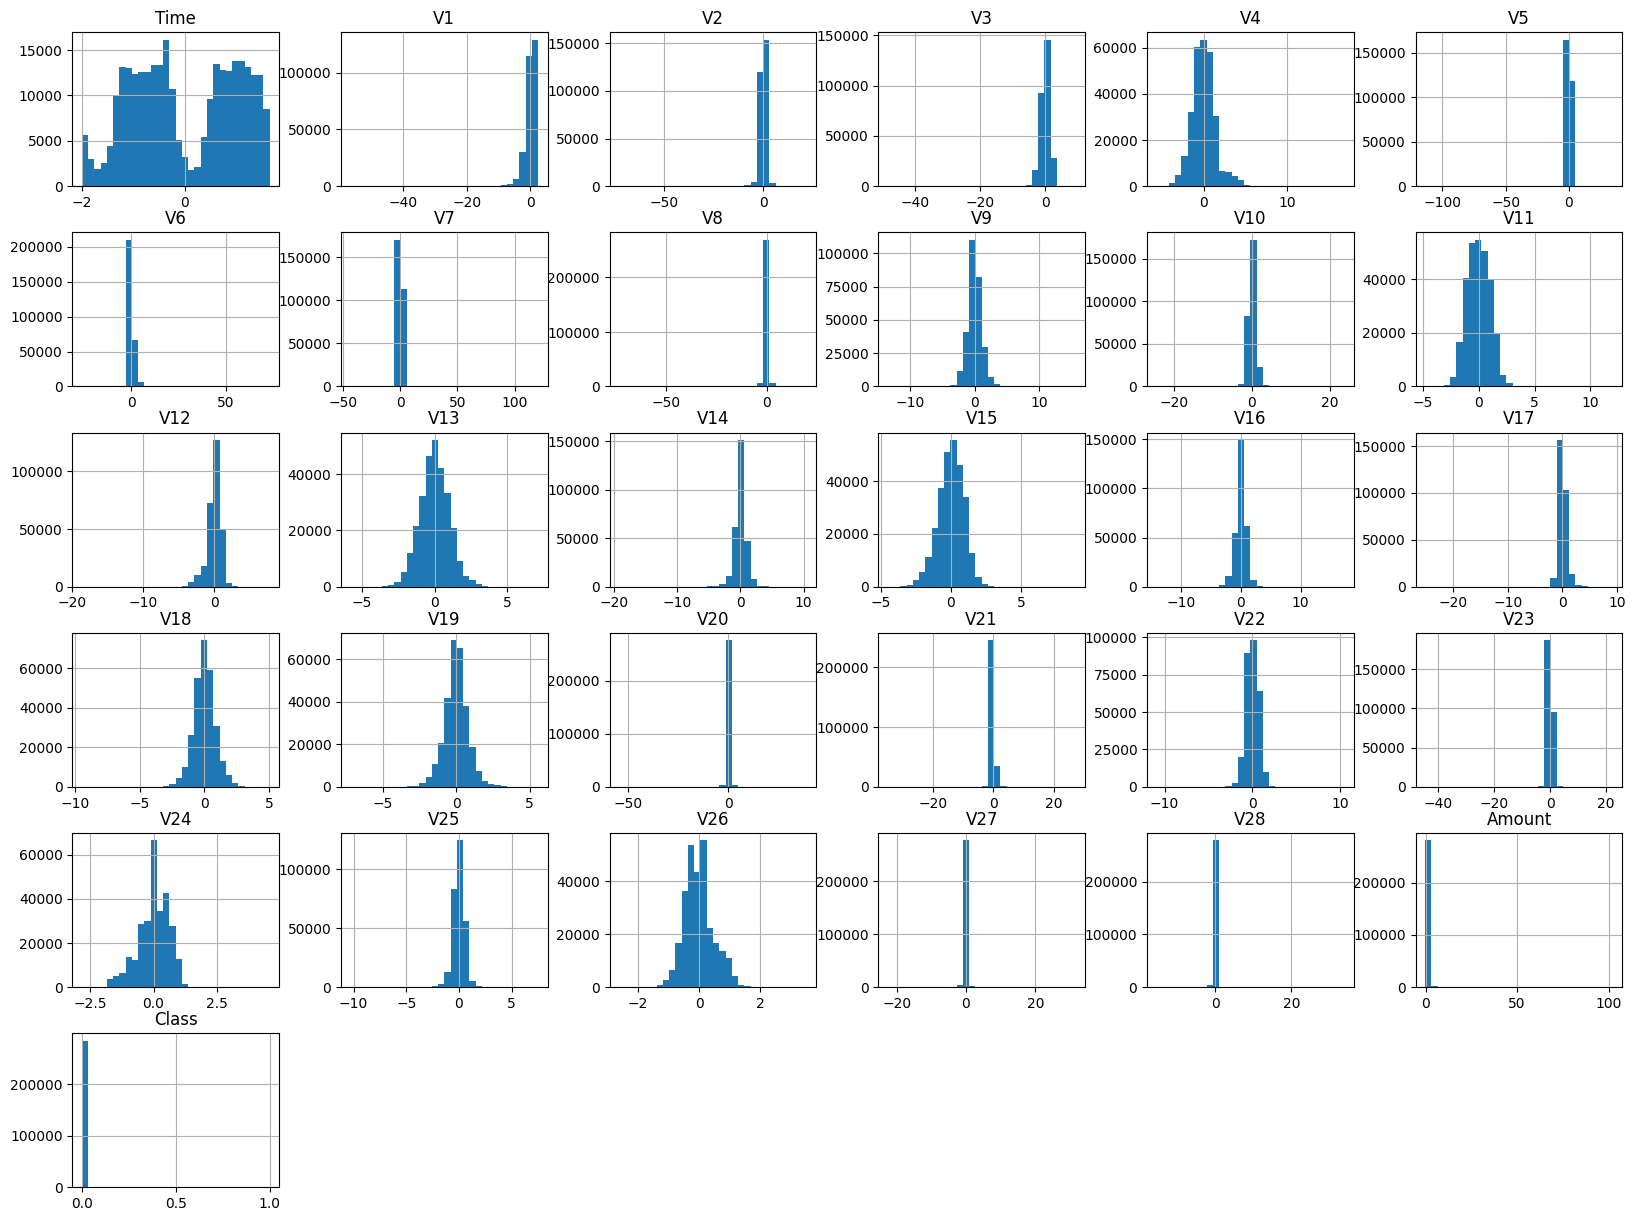

In [6]:
# Visualize all df columns to check for anomalies
df.hist(bins=30, figsize=(20,15))

<Axes: >

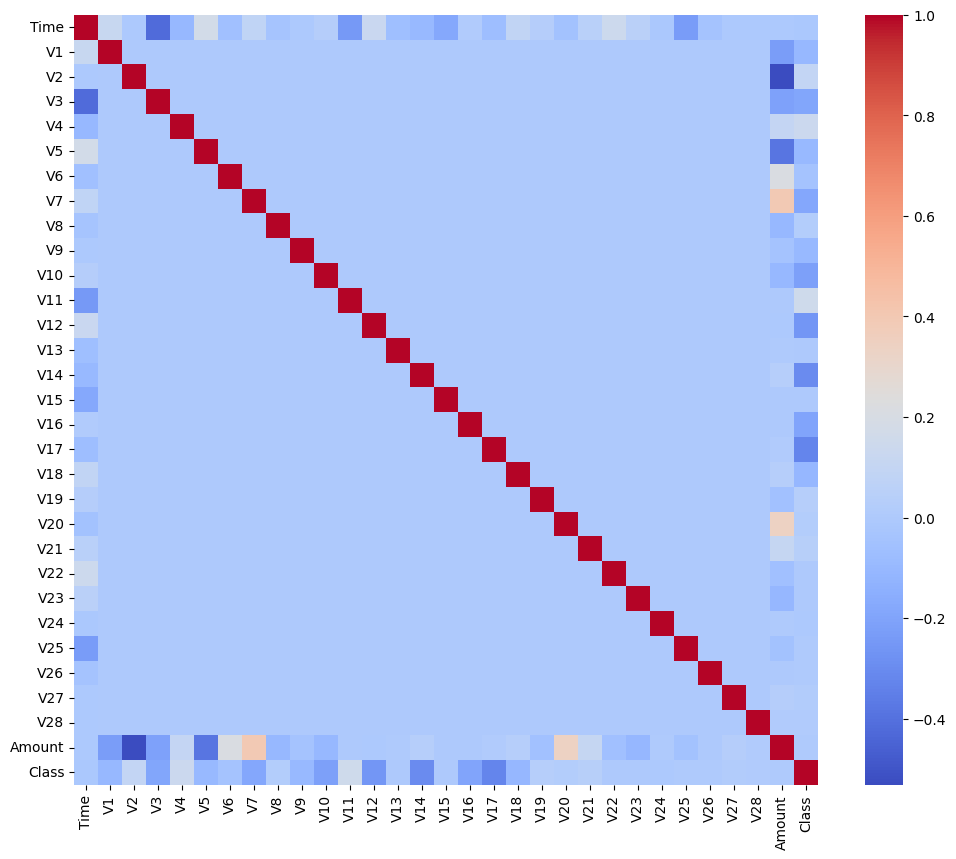

In [7]:
# Correlation matrix heatmap          
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

<Axes: xlabel='Time', ylabel='Count'>

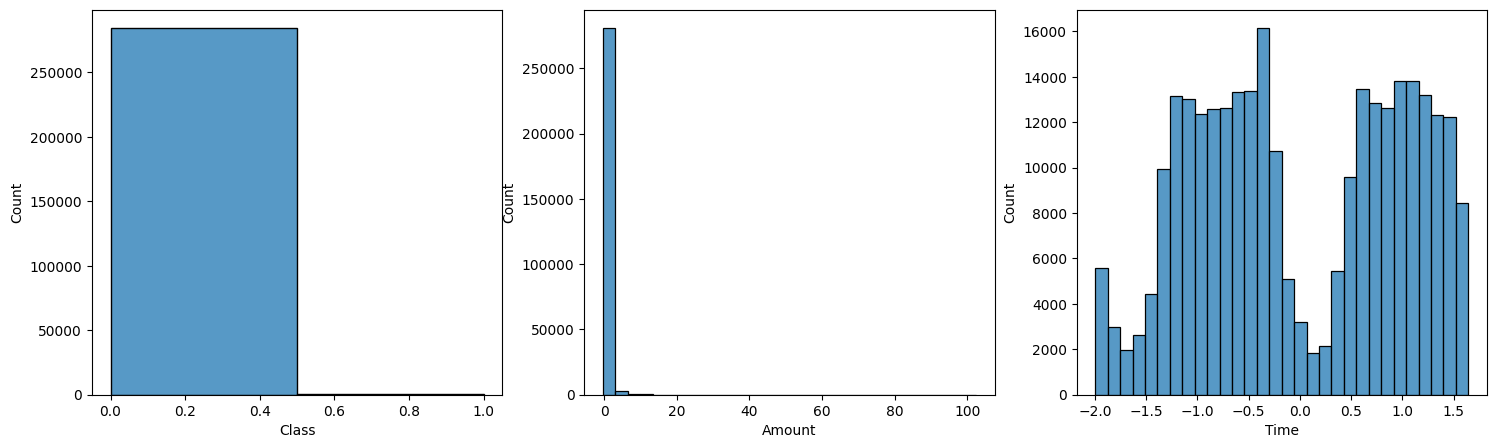

In [8]:
# visualise distribution only of class, amount and time columns and make the plots smaller to fit one figure    
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Class'], bins=2, ax=axes[0])         
sns.histplot(df['Amount'], bins=30, ax=axes[1])
sns.histplot(df['Time'], bins=30, ax=axes[2])   

<Axes: xlabel='Log_Amount', ylabel='Count'>

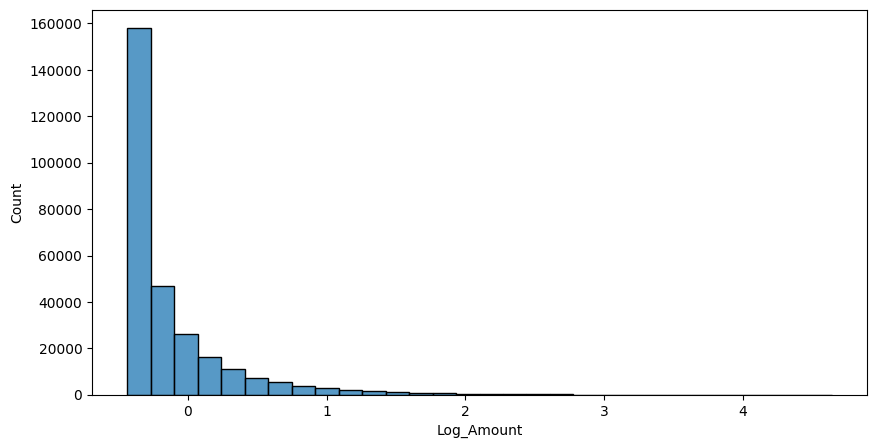

In [9]:
# apply log transformation to 'Amount' column to reduce skewness
df['Log_Amount'] = np.log1p(df['Amount'])
# visualize the effect of log transformation
plt.figure(figsize=(10, 5))
sns.histplot(df['Log_Amount'], bins=30)

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.